# Principal Component Analysis

### Import all the necessary libraries and cancer data.

### Import the data to a dataframe and view 10 rows

In [23]:
# Id columns is to identify rows hence can be skipped in analysis
# All columns have numerical values
# Class would be the target variable. Should be removed when PCA is done

### Describe the dataset

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline

In [25]:
df=pd.read_csv('breast-cancer-wisconsin-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [ ]:
# Id column can be removed as it is only to identify rows
# All columns have numerical values
# Class would be the target variable. Should be removed when PCA is done

In [26]:
df = df.drop(columns=['ID', 'Class'], axis=1)

In [27]:
df.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary

#### Hint: Look for "?" in the data and replace with mode

In [28]:
df.info()
#Barenuclei column has numeric values, but the data type shows as object because it has a few rows which are non-numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
dtypes: int64(8), object(1)
memory usage: 49.2+ KB


In [29]:
#Finding values which are non-numeric
mask = df['Bare Nuclei'].map(lambda x: not str(x).isdigit())
df[mask]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
23,8,4,5,1,2,?,7,3,1
40,6,6,6,9,6,?,7,8,1
139,1,1,1,1,1,?,2,1,1
145,1,1,3,1,2,?,2,1,1
158,1,1,2,1,3,?,1,1,1
164,5,1,1,1,2,?,3,1,1
235,3,1,4,1,2,?,3,1,1
249,3,1,1,1,2,?,3,1,1
275,3,1,3,1,2,?,2,1,1
292,8,8,8,1,2,?,6,10,1


In [30]:
#Replacing non numeric values to nan values and further replacing with mode of the column

df=df.replace('?',np.nan)
df.fillna(df['Bare Nuclei'].mode() [0], inplace=True)

In [31]:
#converting the column to int data type

df['Bare Nuclei'] = df['Bare Nuclei'].map(int)
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
dtypes: int64(9)
memory usage: 49.2 KB


### Check for correlation and plot pairplots

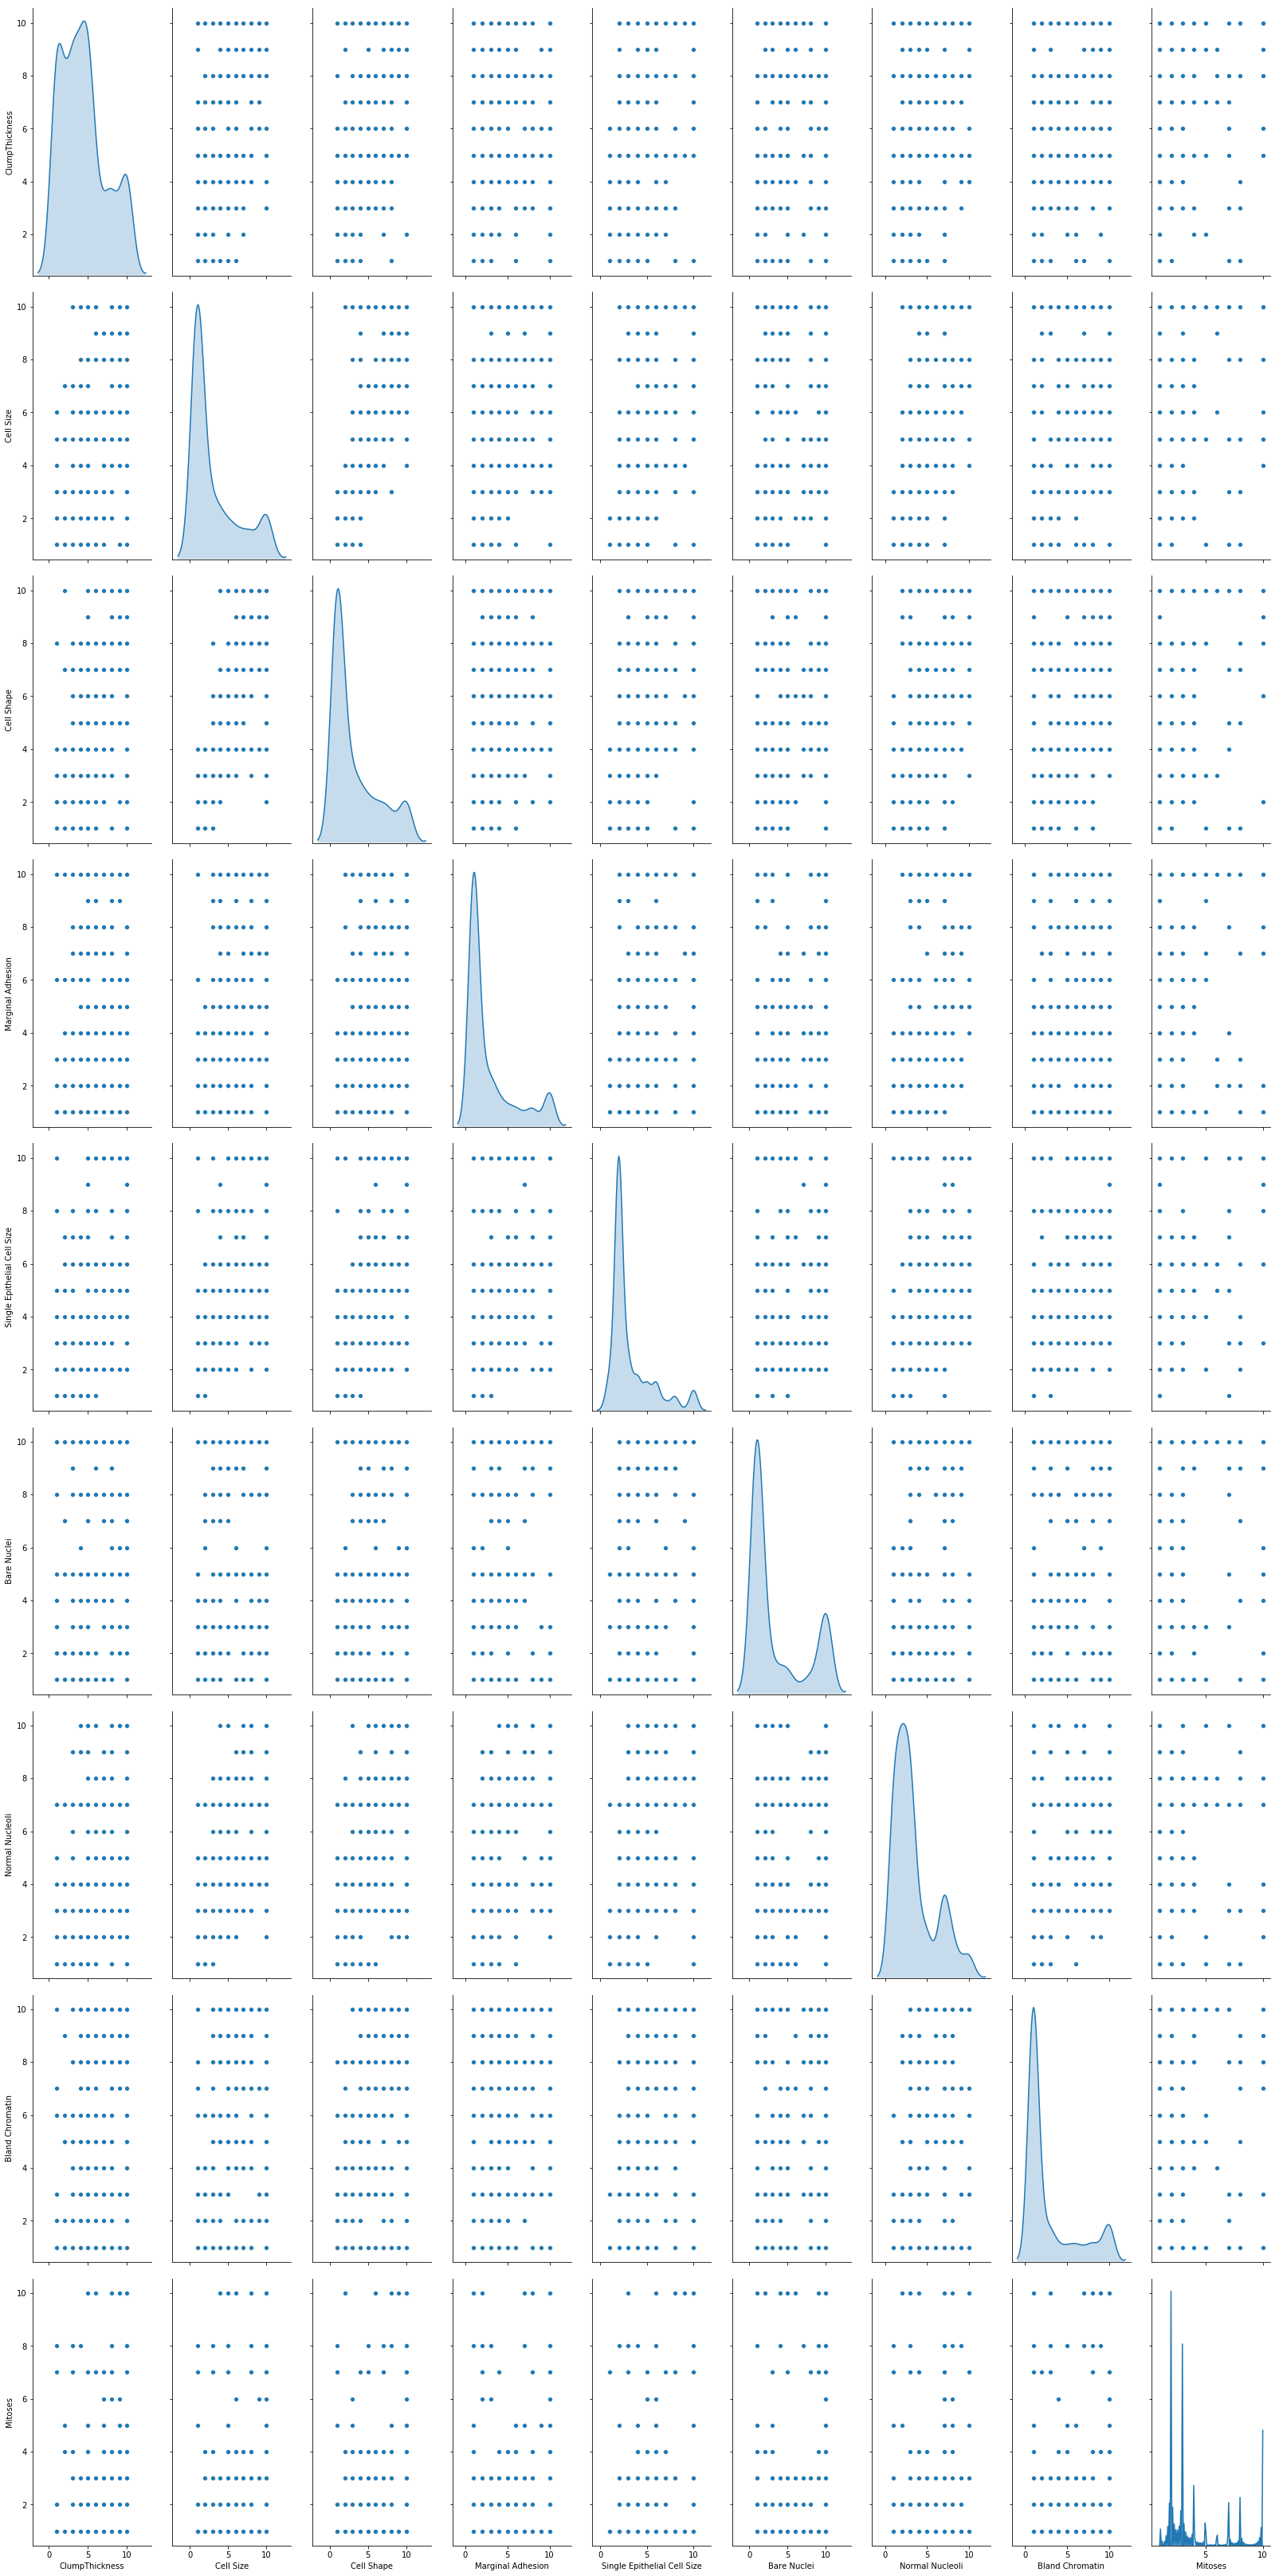

In [32]:
sns.pairplot(df, height = 5, aspect=0.5 , diag_kind='kde')

In [33]:
df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000


### Pre-processing: Remove any unwanted columns or outliers, standardize variables
### Use Z score from scipy.stats

In [34]:
#Finding and removing duplicate records based on ID 
df.drop_duplicates(keep = 'first', inplace = True)

In [35]:
df.shape

(457, 9)

In [36]:
from scipy.stats import zscore
df1 =df.apply(zscore)

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 698
Data columns (total 9 columns):
ClumpThickness                 457 non-null float64
Cell Size                      457 non-null float64
Cell Shape                     457 non-null float64
Marginal Adhesion              457 non-null float64
Single Epithelial Cell Size    457 non-null float64
Bare Nuclei                    457 non-null float64
Normal Nucleoli                457 non-null float64
Bland Chromatin                457 non-null float64
Mitoses                        457 non-null float64
dtypes: float64(9)
memory usage: 35.7 KB


### Create a covariance matrix for identifying Principal components

In [41]:
# You can also use np.cov(cancerDF.T)
df1_cov=np.cov(df1.T)
df1_cov

array([[1.00219298, 0.57421719, 0.58633441, 0.37722037, 0.42579484,
        0.50626202, 0.49155392, 0.44597517, 0.2943452 ],
       [0.57421719, 1.00219298, 0.87817812, 0.63755341, 0.68810192,
        0.58544869, 0.71225418, 0.65500437, 0.40224002],
       [0.58633441, 0.87817812, 1.00219298, 0.60990617, 0.64716325,
        0.61144829, 0.68668149, 0.65290503, 0.37994219],
       [0.37722037, 0.63755341, 0.60990617, 1.00219298, 0.52468706,
        0.58812775, 0.60959039, 0.51069197, 0.35649384],
       [0.42579484, 0.68810192, 0.64716325, 0.52468706, 1.00219298,
        0.47846556, 0.55183338, 0.55580955, 0.43364753],
       [0.50626202, 0.58544869, 0.61144829, 0.58812775, 0.47846556,
        1.00219298, 0.60142926, 0.46704112, 0.26419522],
       [0.49155392, 0.71225418, 0.68668149, 0.60959039, 0.55183338,
        0.60142926, 1.00219298, 0.60559498, 0.27758891],
       [0.44597517, 0.65500437, 0.65290503, 0.51069197, 0.55580955,
        0.46704112, 0.60559498, 1.00219298, 0.36791067],


### Identify eigen values and eigen vector and print them

In [42]:
from numpy.linalg import eig
EigenValue , EigenVector=eig(df1_cov)
EigenVector

array([[-2.93437841e-01,  1.56686643e-01, -8.28892750e-04,
         8.40409833e-01,  9.35268697e-02, -2.62045044e-01,
         2.81670895e-01,  1.60779467e-01,  2.12307238e-02],
       [-3.92126428e-01,  3.09439075e-02,  7.37932331e-01,
        -3.89365063e-03, -2.12868730e-01,  3.46282303e-01,
        -1.66727264e-01,  2.81017329e-01, -1.69489835e-01],
       [-3.87214171e-01,  7.38041845e-02, -6.61036639e-01,
         5.39451749e-02, -1.88896388e-01,  5.23227590e-01,
        -1.75884524e-01,  2.22799597e-01, -1.21303852e-01],
       [-3.29688815e-01,  5.39541554e-02, -4.64471936e-02,
        -4.69626821e-01,  4.18161111e-01, -1.15065488e-01,
         5.18907141e-01,  4.52394111e-01,  6.05285645e-02],
       [-3.34803653e-01, -2.30015100e-01, -7.11526672e-02,
        -1.33563439e-01, -2.66633440e-01, -3.32795489e-01,
         2.03507319e-01, -3.42241233e-01, -6.86809401e-01],
       [-3.22501636e-01,  3.07143902e-01,  7.52683487e-02,
        -3.25990188e-03,  5.81815862e-01,  2.480066

In [43]:
EigenValue

array([5.33088524, 0.84942609, 0.11824294, 0.6487132 , 0.58155895,
       0.32129264, 0.33966597, 0.38064067, 0.44931115])

### Find variance and cumulative variance by each eigen vector
#### Find total of eig_val
#### For each eig_val divide it by total and multiply by 100 the result. Save it in an array called explained variance. Use for loop to iterate through the eig_val array.
#### Do a cumulative sum of all the explained variance.
#### Plot the explained variance.

In [44]:
tot = sum(EigenValue)
tot

9.019736842105257

In [45]:
var_explained = [(i/tot)*100 for i in sorted(EigenValue, reverse = True)]
cum_var = np.cumsum(var_explained)

In [46]:
cum_var

array([ 59.10244759,  68.51986303,  75.7120152 ,  82.15964173,
        87.1410637 ,  91.36114987,  95.12695789,  98.68906446,
       100.        ])

In [ ]:
# To find the total number of components, take value where the variance crosses 90%. Here, it can be either 5, 6 or 7.

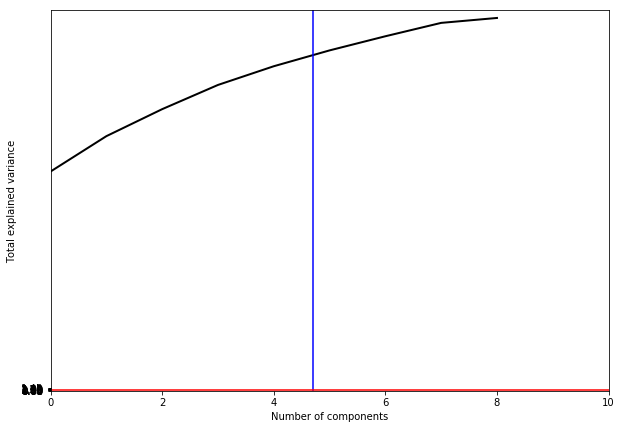

In [47]:
plt.figure(figsize=(10,7))

plt.plot(cum_var, color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 10)
plt.yticks(np.arange(0.7, 1.5, 0.05))

plt.axvline(4.7, c='b')
plt.axhline(0.9, c='r')

plt.show()

### Use PCA from sklearn and find the Principal Components. Transform data to components formed.
#### import PCA from sklearn.decomposition
#### use PCA.components_ to get the components

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA(n_components=6)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_pca = pca.transform(df)

In [52]:
X_pca.shape

(457, 6)

#### Convert PCA components to a dataframe. Find out correlation between the components and the dataframe columns

In [53]:
PCA_Comp = pd.DataFrame(X_pca)

In [54]:
PCA_Comp

,0,1,2,3,4,5
0,-7.226042,0.261510,-1.215346,0.274754,0.330426,-1.049116
1,2.037739,-4.872408,0.883979,0.448551,0.483471,2.499138
2,-7.334417,-0.447864,0.266468,-0.327822,-0.270762,0.145874
3,2.390540,3.534492,-2.780203,-1.251353,-2.789336,1.295155
4,-6.815362,0.046237,0.788205,0.769711,0.472924,-1.643243
5,12.306331,-0.666683,0.221288,0.982918,-3.033697,-0.380185
6,-4.432425,-6.705266,1.567130,-3.115213,-0.637003,3.300402
7,-7.642378,0.549446,0.918108,0.058989,-0.943337,0.487060
8,-8.107874,0.996450,1.128800,0.520538,2.883633,2.094952
9,-7.387210,0.514815,-0.594802,0.463916,0.039015,-0.225524


In [55]:
pca.explained_variance_

array([50.7941648 ,  7.78360417,  5.65596805,  4.67689221,  3.73802941,
        3.54862352])

In [56]:
pca.explained_variance_ratio_

array([0.61808183, 0.09471372, 0.06882387, 0.05691012, 0.0454857 ,
       0.04318094])

In [57]:
PCA_Comp.corr()

,0,1,2,3,4,5
0,1.000000e+00,1.290297e-14,6.522549e-16,1.010973e-16,-1.928064e-16,-4.766867e-16
1,1.290297e-14,1.000000e+00,5.317774e-16,-4.293564e-17,3.668744e-16,6.414997e-17
2,6.522549e-16,5.317774e-16,1.000000e+00,9.581285e-17,-1.181856e-16,-3.630266e-17
3,1.010973e-16,-4.293564e-17,9.581285e-17,1.000000e+00,-3.027950e-16,-8.127849e-17
4,-1.928064e-16,3.668744e-16,-1.181856e-16,-3.027950e-16,1.000000e+00,-3.294312e-16
5,-4.766867e-16,6.414997e-17,-3.630266e-17,-8.127849e-17,-3.294312e-16,1.000000e+00


# Support Vector Machines

#### Read the input file 'diabetes.csv' using Pandas and check it's column names

In [59]:
svmdata = pd.read_csv('diabetes.csv')

In [60]:
svmdata.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [61]:
svmdata.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
97,1,71,48,18,76,20.4,0.323,22,0
110,3,171,72,33,135,33.3,0.199,24,1
430,2,99,0,0,0,22.2,0.108,23,0
181,0,119,64,18,92,34.9,0.725,23,0
334,1,95,60,18,58,23.9,0.260,22,0
351,4,137,84,0,0,31.2,0.252,30,0
273,1,71,78,50,45,33.2,0.422,21,0
667,10,111,70,27,0,27.5,0.141,40,1
90,1,80,55,0,0,19.1,0.258,21,0
185,7,194,68,28,0,35.9,0.745,41,1


In [62]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    svmdata[column] = svmdata[column].replace(0, np.NaN)
    mean = int(svmdata[column].mean(skipna=True))
    svmdata[column] = svmdata[column].replace(np.NaN, mean)

In [63]:
svmdata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [64]:
svmdata.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Do correlation analysis using heatmap 

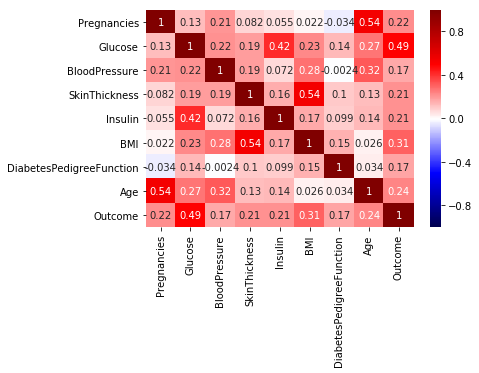

In [65]:
sns.heatmap(svmdata.corr(),annot=True,vmin=-1,vmax=1,cmap='seismic')

#### Split the dataset and Scale the data points using MinMaxScaler

In [66]:
y = svmdata['Outcome']
x = svmdata.drop('Outcome', axis = 1)

In [67]:
x.shape

(768, 8)

In [68]:
y.shape

(768,)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.20)

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#### Train Support Vector Machine Model

In [72]:
classifier = SVC(random_state=0, kernel='rbf')
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [73]:
y_pred = classifier.predict(X_test)

In [74]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

## Popularity based Recommendation systems

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

### Read the dataset(jokes.csv).
Check whether you file has header or not in it. If there is no header, then use header=none while reading the dataset

In [81]:
jokes=pd.read_csv('jokes.csv')

In [82]:
jokes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Columns: 101 entries, NumJokes to Joke100
dtypes: float64(100), int64(1)
memory usage: 19.3 MB


In [83]:
jokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [84]:
ratings=pd.DataFrame(jokes.iloc[0:200:,1:101])
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 100 columns):
Joke1      200 non-null float64
Joke2      200 non-null float64
Joke3      200 non-null float64
Joke4      200 non-null float64
Joke5      200 non-null float64
Joke6      200 non-null float64
Joke7      200 non-null float64
Joke8      200 non-null float64
Joke9      200 non-null float64
Joke10     200 non-null float64
Joke11     200 non-null float64
Joke12     200 non-null float64
Joke13     200 non-null float64
Joke14     200 non-null float64
Joke15     200 non-null float64
Joke16     200 non-null float64
Joke17     200 non-null float64
Joke18     200 non-null float64
Joke19     200 non-null float64
Joke20     200 non-null float64
Joke21     200 non-null float64
Joke22     200 non-null float64
Joke23     200 non-null float64
Joke24     200 non-null float64
Joke25     200 non-null float64
Joke26     200 non-null float64
Joke27     200 non-null float64
Joke28     200 non-null float6

In [85]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Change the column indices from 0 to 99

In [86]:
ratings.rename(inplace = True, columns={x:y for x,y in zip(ratings.columns,range(0,len(ratings.columns)))})
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### In the dataset, the null ratings are given as 99, so replace all 99s with 0

In [87]:
ratings.replace(99,0, inplace = True)

In [88]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [89]:
sc_X = StandardScaler()
ratings_diff = pd.DataFrame(sc_X.fit_transform(ratings))

In [90]:
ratings_diff.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133


### Find the mean for each column  in `ratings_diff` i.e, for each joke

In [91]:
mean = pd.DataFrame(ratings_diff.mean(axis = 0))
mean.head()

,0
0,-1.110223e-17
1,-9.658940e-17
2,-4.107825e-17
3,3.719247e-17
4,-8.881784e-18


### Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [93]:
print("Top 10 Jokes based on mean Rating : " , (mean.nlargest(10, 0).index))

Top 10 Jokes based on mean Rating :  Int64Index([98, 81, 97, 20, 94, 92, 47, 73, 99, 49], dtype='int64')


## Recommendation Systems - Content based modeling - OPTIONAL

#### Import movies_metadata.csv

#### Check whether tagline has NA values. If so do a fillna with '' (two single quotes with no spaces)
#### Create a new column Description by appending tagline and overview column
#### Drop rows from the dataframe where the newly created Description column is NA.
#### Drop duplicates from the Title column
#### Check the count of records before and after dropping the Description column
#### Do a reset of the index


In [27]:
movie.dropna(inplace=True, subset=['Description'])
#movie['title'].drop_duplicates(inplace=True)
movie.drop_duplicates(subset=['title'], inplace=True)

#### Use TFIDF vectorizer and create tfidf matrix only for Description column
#### use ngram (1,3), analyzer as word, stop words as english and min_df = 0

#### from sklearn.metrics.pairwise import linear_kernel
#### Pass on the tfidf_matrix created
##### This is used to find the similarities in the data

In [34]:
#The below two codes help create a series where index would be the title of the movie and column will be the index
titles = movie['title']
indices = pd.Series(movie.index, index=movie['title'])

In [40]:
def recommend(title):
    idx = indices[title]
    print('idx value is ', idx)
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    print(sim_scores)
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [ ]:
recommend('Jumanji').head(10)